In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo
from scipy import signal
import scipy.cluster.hierarchy as spc

Creation of pickles with data from google trend

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

#list topics 
ecology_topic = ["/m/02mgp"] 
green_peace = ["green peace"] 
sea_shepherd = ["sea sheperd"] 
climate_change_topic = ["/m/0cs9q"]
giec = ["giec"]
global_warming_topic = ["/m/0d063v"]

kw_list = [ecology_topic,green_peace,sea_shepherd,climate_change_topic,giec,global_warming_topic]

#list country https://abbreviations.yourdictionary.com/articles/abbreviations-european-union.html
country_list = ["FR","BE","BG","CY","CZ","DE","DK","EE","ES","FI","AT","GB","GR","HR","HU","IE","IT","LT","LU","LV","MT","NL","PL","PT","RO","SE","SI","SK"]

for x in range(0, len(kw_list)):
    
    #adding just the first one
    pytrends.build_payload(kw_list[x], cat=0, timeframe='all', geo=country_list[0], gprop='')
    pytrends.interest_over_time()
    newDataframe = pytrends.interest_over_time()[kw_list[x]]
    listColumn = []
    listColumn.append(country_list[0])
        
    for y in range(1, len(country_list)): 
        pytrends.build_payload(kw_list[x], cat=0, timeframe='all', geo=country_list[y], gprop='')
        ledata = pytrends.interest_over_time()
        if not ledata.empty:
            ledata.drop(ledata.columns[len(ledata.columns)-1], axis=1, inplace=True)
            newDataframe = pd.concat([newDataframe, ledata], axis=1, join='inner')
            listColumn.append(country_list[y])

    newDataframe.columns = listColumn
    newDataframe.to_pickle("./data_martin/GoogleTrend"+str(x)+".pkl") 



Read Pickles 

In [3]:
df_ecology = pd.read_pickle("./data_martin/GoogleTrend0.pkl")
df_green_peace = pd.read_pickle("./data_martin/GoogleTrend1.pkl")
df_sea_shepherd = pd.read_pickle("./data_martin/GoogleTrend2.pkl")
df_climate_change = pd.read_pickle("./data_martin/GoogleTrend3.pkl")
df_giec = pd.read_pickle("./data_martin/GoogleTrend4.pkl")
df_global_warming = pd.read_pickle("./data_martin/GoogleTrend5.pkl")

Plot Google trend

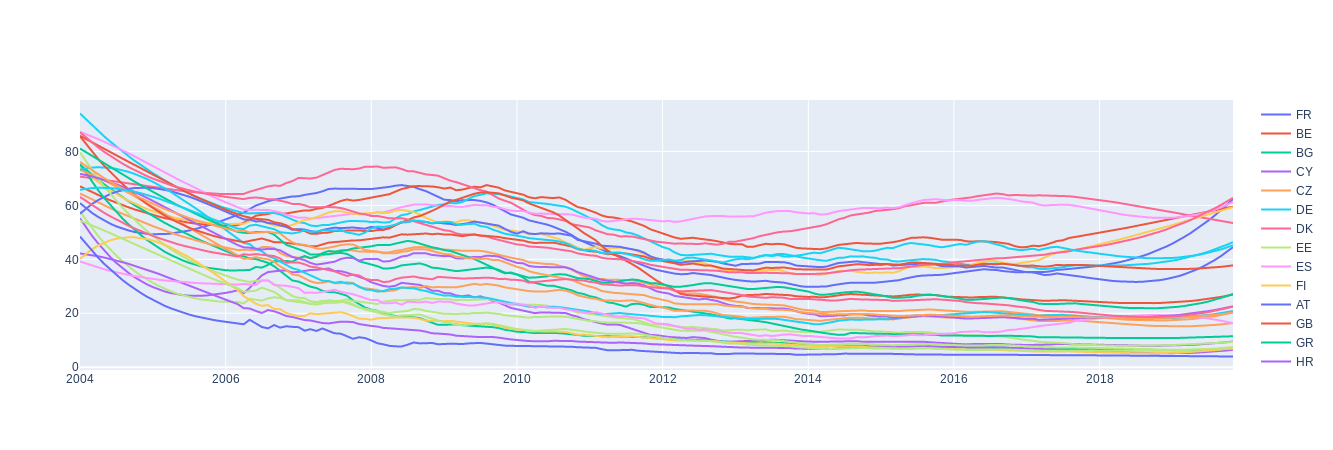

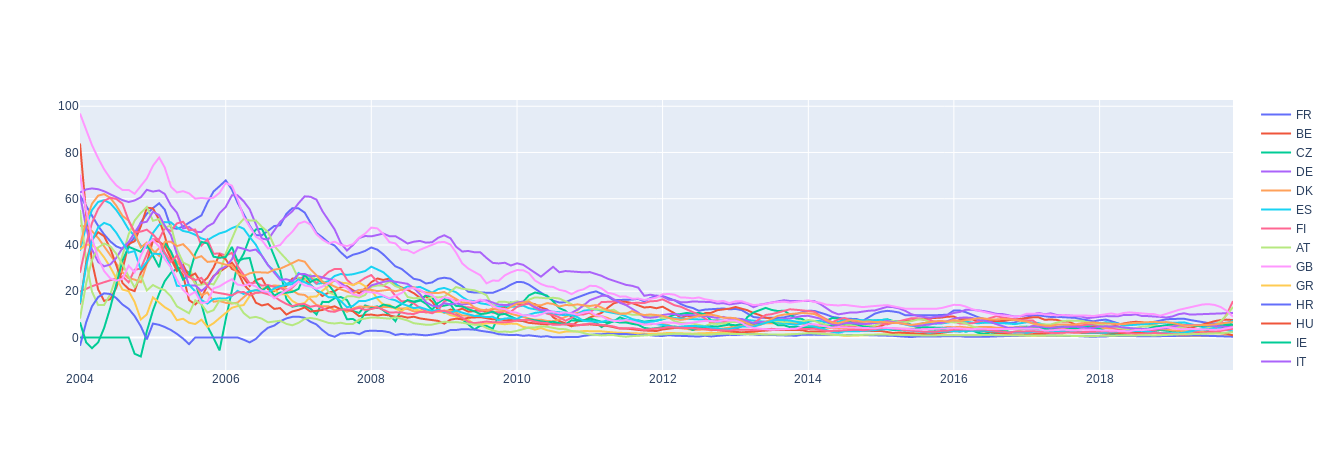

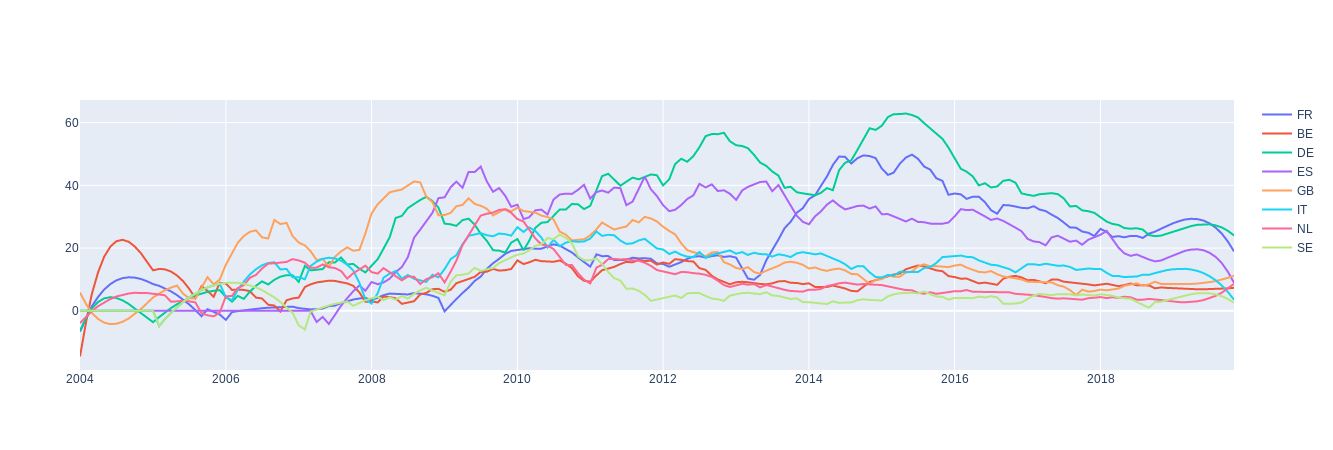

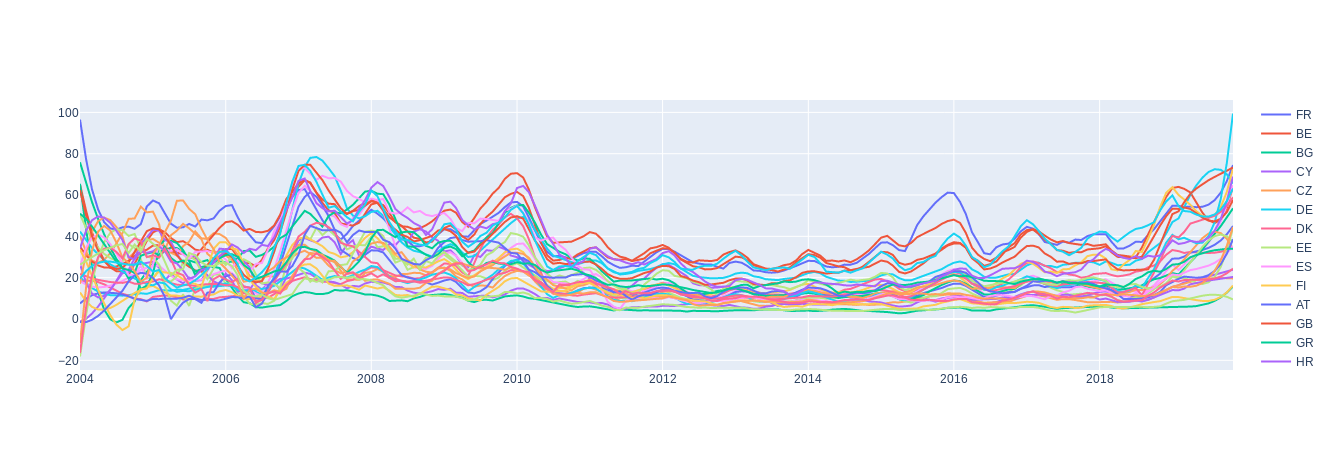

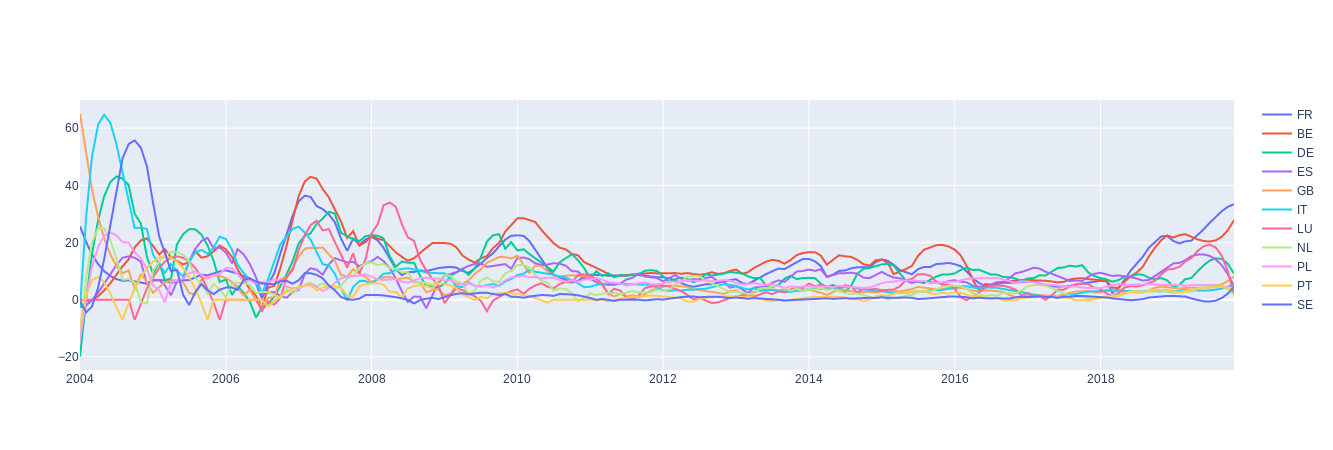

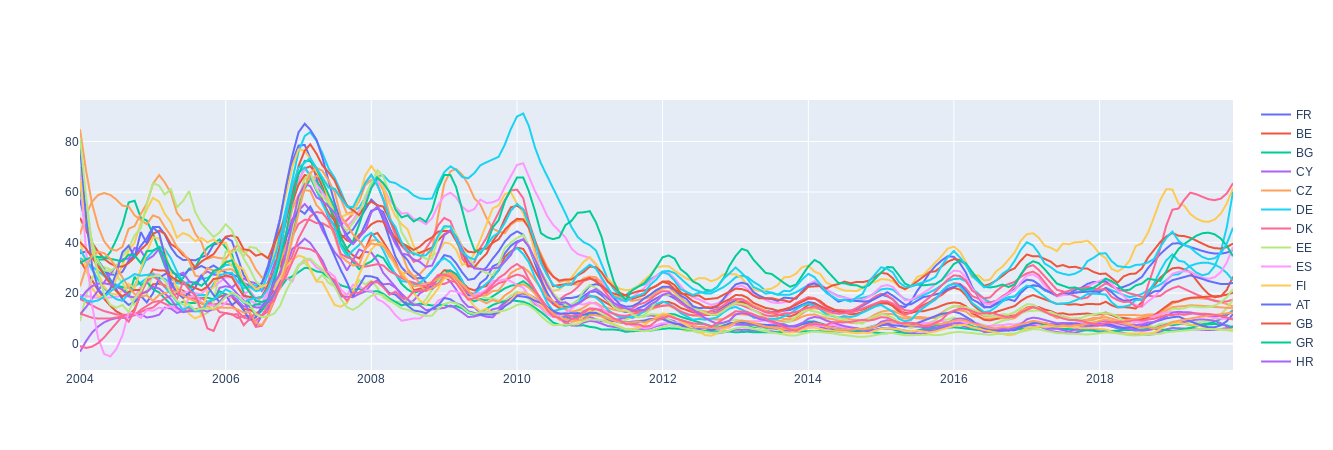

In [4]:
fig = go.Figure()
for x in df_ecology.columns: 
    fig.add_trace(go.Scatter(x=df_ecology.index, y=signal.savgol_filter(df_ecology[x],53, 3), mode='lines',name=x))
fig.show()

fig = go.Figure()
for x in df_green_peace.columns: 
    fig.add_trace(go.Scatter(x=df_green_peace.index, y=signal.savgol_filter(df_green_peace[x],15, 3), mode='lines',name=x))
fig.show()

fig = go.Figure()
for x in df_sea_shepherd.columns: 
    fig.add_trace(go.Scatter(x=df_sea_shepherd.index, y=signal.savgol_filter(df_sea_shepherd[x],25, 3), mode='lines',name=x))
fig.show()

fig = go.Figure()
for x in df_climate_change.columns: 
    fig.add_trace(go.Scatter(x=df_climate_change.index, y=signal.savgol_filter(df_climate_change[x],15, 3), mode='lines',name=x))
fig.show()

fig = go.Figure()
for x in df_giec.columns: 
    fig.add_trace(go.Scatter(x=df_giec.index, y=signal.savgol_filter(df_giec[x],15, 3), mode='lines',name=x))
fig.show()

fig = go.Figure()
for x in df_global_warming.columns: 
    fig.add_trace(go.Scatter(x=df_global_warming.index, y=signal.savgol_filter(df_global_warming[x],15, 3), mode='lines',name=x))
fig.show()

Regroup country with similarity interest on subjects

In [5]:
df_corr_ecology = df_ecology.corr(method ='pearson') 
df_corr_green_peace = df_green_peace.corr(method ='pearson') 
df_corr_sea_shepherd = df_sea_shepherd.corr(method ='pearson') 
df_corr_climate_change = df_climate_change.corr(method ='pearson') 
df_corr_giec = df_giec.corr(method ='pearson') 
df_corr_global_warming = df_global_warming.corr(method ='pearson') 


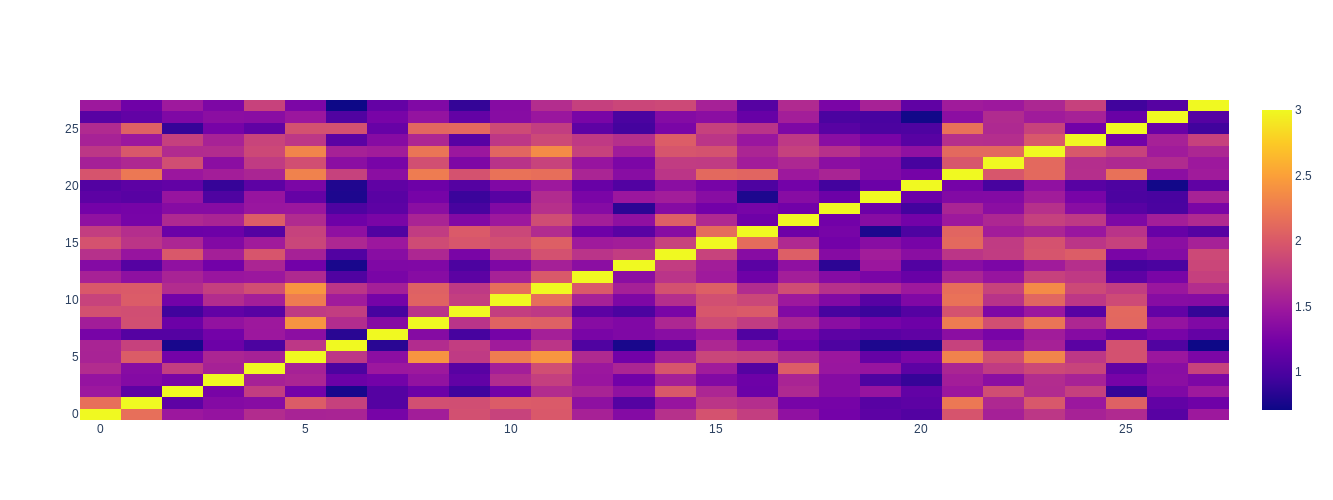

In [6]:
#define a matrix of correlation for the 3 topics (climate change, ecology and global warming)
corr = df_corr_ecology.values + df_corr_climate_change.values + df_corr_global_warming.values 
fig = go.Figure(data=go.Heatmap(z=corr))
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig.show()

In [22]:
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.95 * pdist.max(), 'distance')

groupe1 = []
groupe2 = []
for i in range(0,len(idx)):
    x = idx[i]
    if x == 1:
        groupe1.append(i)
    else:
        groupe2.append(i)

Plot to show difference between two groups

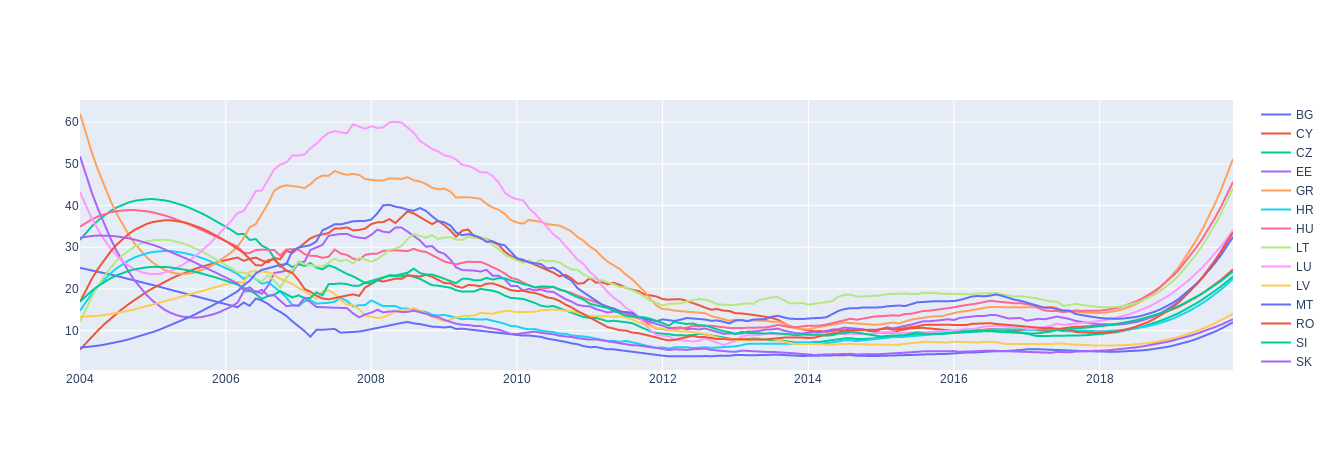

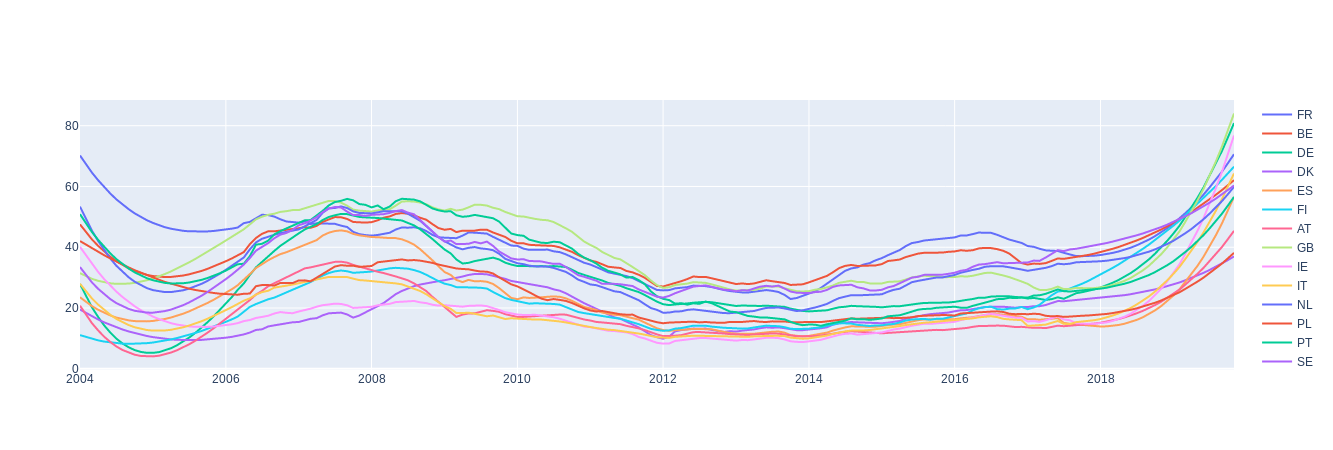

In [23]:
df1 = df_climate_change[df_ecology.columns[groupe1]]

fig = go.Figure()
for x in df1.columns: 
    fig.add_trace(go.Scatter(x=df1.index, y=signal.savgol_filter(df1[x],53, 3), mode='lines',name=x))
fig.show()


df1 = df_climate_change[df_ecology.columns[groupe2]]

fig = go.Figure()
for x in df1.columns: 
    fig.add_trace(go.Scatter(x=df1.index, y=signal.savgol_filter(df1[x],53, 3), mode='lines',name=x))
fig.show()